# Generation of observation from inhomogenous Poisson process

## Algorithm by Lewis and Shedler, 1979

In [1]:
import numpy as np
from Generator import LewisShedler

In [2]:
T = np.pi
n_size = 1000

In [3]:
def lam(t):
    return np.where(t < 1, n_size, n_size*(np.sin(t**2*np.pi)+1)/3)

In [4]:
generator = LewisShedler(lam, T, lambda_hat=n_size)

Maximum of the intensity function: 1000.0


In [5]:
%%timeit 
t = generator.generate()

515 µs ± 328 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
t = generator.generate()
print('Number of simulated points: {}'.format(len(t)))

Number of simulated points: 1660


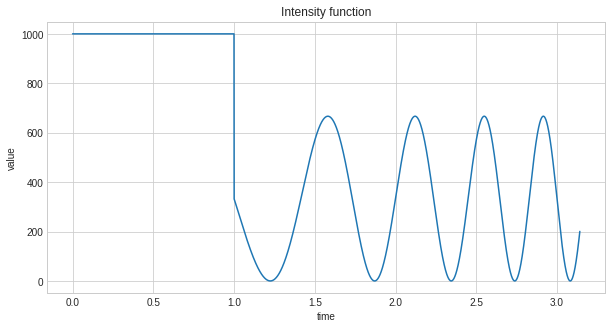

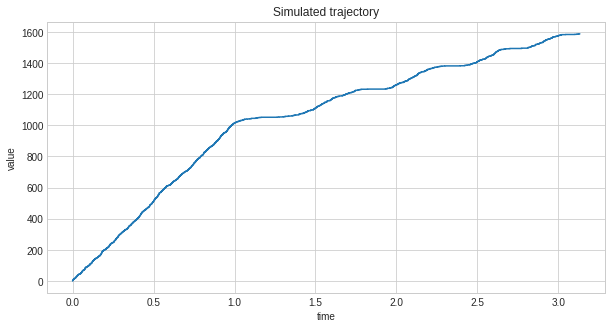

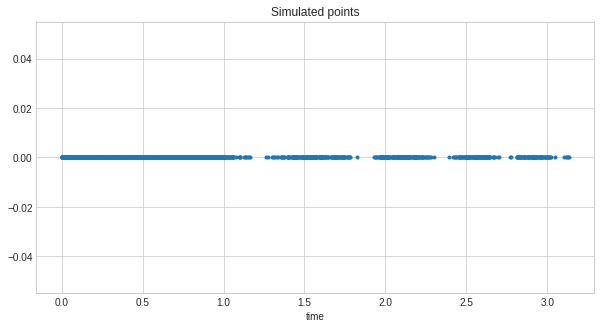

<Figure size 720x360 with 0 Axes>

In [7]:
generator.visualize(save=False)

# Approximation of integral operator

In [8]:
import numpy as np
import dask.array as da
from dask.diagnostics import ProgressBar
from Operator import Operator

In [9]:
def kernel(x, y):
    return np.repeat(1, len(x))

In [10]:
operator = Operator(kernel, 0, 1, 500, "rectangle")

In [11]:
oper = operator.approximate(compute=False)

approximate ran in 0.04921841621398926 s


In [12]:
with ProgressBar():
    oper = operator.K.compute()
oper.shape

[########################################] | 100% Completed |  1.7s


(500, 500)

# Estimation of intensity function using Landweber iteration

In [13]:
sample_size = 100

In [14]:
def kernel(x, y):
    return np.where(x < y, 1, 1)

In [15]:
def lam(t):
    return np.where(t<1, sample_size, sample_size)

Maximum of the intensity function: 100


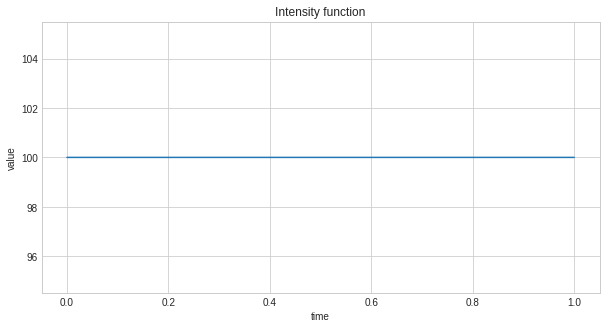

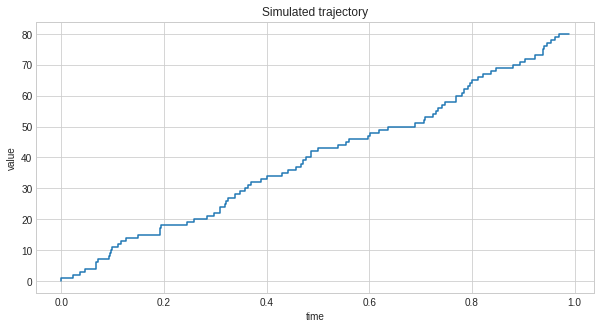

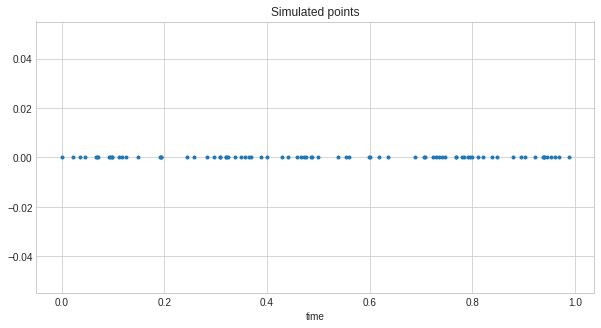

<Figure size 720x360 with 0 Axes>

In [16]:
from Generator import LewisShedler
generator = LewisShedler(lam, 1)
obs = generator.generate()
generator.visualize()

In [17]:
from Estimators import Landweber

In [18]:
landwerber = Landweber(kernel, 0, 1, 500, obs, sample_size, 'rectangle', relaxation=0.05, max_iter=200)

approximate ran in 0.04473114013671875 s


/home/grzegorz/anaconda3/envs/poisson/lib/python3.6/site-packages/dask/array/routines.py:319: PerformanceWarning: Increasing number of chunks by factor of 500
  concatenate=True,


In [25]:
landwerber.observations = generator.generate()
landwerber.refresh()
landwerber.observations

array([0.        , 0.00359972, 0.00597699, 0.0163303 , 0.06239202,
       0.07471265, 0.09443142, 0.10621266, 0.10672931, 0.10955302,
       0.11307924, 0.11550468, 0.1406641 , 0.15909769, 0.16478585,
       0.17021526, 0.18069497, 0.18486847, 0.18575103, 0.2103884 ,
       0.2211026 , 0.23319796, 0.23611512, 0.26200345, 0.26891464,
       0.27247734, 0.2795259 , 0.28792237, 0.2923667 , 0.3057614 ,
       0.31951408, 0.32113083, 0.32961289, 0.34122677, 0.35579118,
       0.37975415, 0.38657231, 0.39914424, 0.40015878, 0.42742195,
       0.42951351, 0.45030413, 0.46226821, 0.47275045, 0.47832204,
       0.48605401, 0.5106392 , 0.51677673, 0.53364441, 0.54443513,
       0.59000739, 0.5960448 , 0.61328198, 0.62930768, 0.63466915,
       0.65221397, 0.68627114, 0.68717466, 0.70078643, 0.70768268,
       0.71378021, 0.72507737, 0.73460209, 0.73514555, 0.74723184,
       0.74884873, 0.75218411, 0.75576212, 0.76204277, 0.76736907,
       0.77630202, 0.80291582, 0.83750767, 0.84960689, 0.87865

In [26]:
landwerber.q_estimator.compute()

array([0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.

In [27]:
landwerber.delta.compute()

0.008700000000000005

In [28]:
landwerber.estimate(compute=True)

Force computations...
[########################################] | 100% Completed |  0.4s
__force_computations ran in 0.637204647064209 s
Iteration: 1
__iteration ran in 0.0002663135528564453 s
Iteration: 2
__iteration ran in 0.0001983642578125 s
Iteration: 3
__iteration ran in 0.00010561943054199219 s
Iteration: 4
__iteration ran in 8.440017700195312e-05 s
Iteration: 5
__iteration ran in 7.867813110351562e-05 s
Iteration: 6
__iteration ran in 7.462501525878906e-05 s
Iteration: 7
__iteration ran in 6.532669067382812e-05 s
Iteration: 8
__iteration ran in 6.127357482910156e-05 s
Iteration: 9
__iteration ran in 5.984306335449219e-05 s
Iteration: 10
__iteration ran in 6.198883056640625e-05 s
Iteration: 11
__iteration ran in 6.031990051269531e-05 s
Iteration: 12
__iteration ran in 6.365776062011719e-05 s
Iteration: 13
__iteration ran in 5.936622619628906e-05 s
Iteration: 14
__iteration ran in 6.198883056640625e-05 s
Iteration: 15
__iteration ran in 6.079673767089844e-05 s
Iteration: 16
__it

In [29]:
landwerber.solution

array([0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414069,
       0.77414069, 0.77414069, 0.77414069, 0.77414069, 0.77414

In [30]:
landwerber.L2norm(landwerber.solution, np.repeat([1], landwerber.solution.shape[0]), sqrt=True).compute()

0.22585930590445477